# Directed Graphs

Directed graphs, or digraphs, are a type of graph where edges have a direction associated with them. In other words, each edge in a directed graph is an ordered pair of vertices, indicating a one-way relationship between them. This directional nature distinguishes directed graphs from undirected graphs.

In a directed graph, vertices (or nodes) are connected by directed edges, which represent the flow or progression from one vertex to another. This directed relationship implies that an edge from vertex A to vertex B does not necessarily imply the existence of an edge from B to A.

Directed graphs are used to model various real-world scenarios, such as dependencies between tasks, network flows, web page links, and social relationships with a sense of direction.


In [20]:
import networkx as nx
import matplotlib.pyplot as plt

class DirectedGraph:
    def __init__(self, no_of_vertices):
        self.no_of_vertices = no_of_vertices
        self.adj_matrix = [[0] * no_of_vertices for _ in range(no_of_vertices)]

    def add_edge(self, start, end, weight=1):
        self.adj_matrix[start][end] = weight

    def remove_edge(self, start, end):
        self.adj_matrix[start][end] = 0

    def display(self):
        for row in self.adj_matrix:
            print(row)

    def add_vertex(self):
        self.no_of_vertices += 1
        # Add a new row for the new vertex
        self.adj_matrix.append([0] * self.no_of_vertices)
        # Add a new column for the new vertex in existing rows
        for row in self.adj_matrix:
            row.append(0)

    def remove_vertex(self, vertex):
        if vertex < self.no_of_vertices:
            del self.adj_matrix[vertex]
            self.no_of_vertices -= 1

            for row in self.adj_matrix:
                del row[vertex]

    def get_neighbors(self, vertex):
        if vertex < self.no_of_vertices:
            return [index for index, weight in enumerate(self.adj_matrix[vertex]) if weight > 0]
        else:
            return []

    def has_edge(self, start, end):
        return self.adj_matrix[start][end] > 0

    def graph_size(self):
        return self.no_of_vertices, sum(row.count(1) for row in self.adj_matrix)

    def clear_graph(self):
        self.no_of_vertices = 0
        self.adj_matrix = []

    def in_degree(self, vertex):
        in_degree_count = 0
        for i in range(self.no_of_vertices):
            in_degree_count += self.adj_matrix[i][vertex]
        return in_degree_count

    def out_degree(self, vertex):
        out_degree_count = 0
        for i in range(self.no_of_vertices):
            out_degree_count += self.adj_matrix[vertex][i]
        return out_degree_count

    def visualize_graph(self):
        G = nx.DiGraph()

        for i in range(self.no_of_vertices):
            G.add_node(i)

        for i in range(self.no_of_vertices):
            for j in range(self.no_of_vertices):
                if self.adj_matrix[i][j] > 0:
                    G.add_edge(i, j, weight=self.adj_matrix[i][j])

        pos = nx.spring_layout(G)

        # Draw nodes with custom attributes
        nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', alpha=0.7)

        # Draw edges with custom attributes
        nx.draw_networkx_edges(G, pos, width=2, edge_color='gray', alpha=0.7)

        # Draw labels
        nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

        # Draw edge labels
        edge_labels = {(i, j): self.adj_matrix[i][j] for i in range(self.no_of_vertices) for j in range(self.no_of_vertices) if self.adj_matrix[i][j] > 0}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

       
        plt.axis('off')
        plt.show()



In [21]:
graph = DirectedGraph(5)

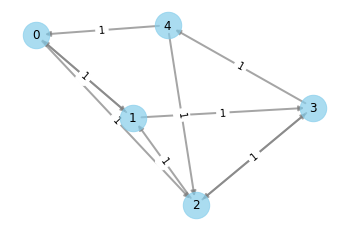

In [22]:
graph.add_edge(0, 1)
graph.add_edge(0, 2)
graph.add_edge(1, 3)
graph.add_edge(2, 3)
graph.add_edge(3, 4)
# Adding more edges
graph.add_edge(4, 0)
graph.add_edge(2, 1)
graph.add_edge(4, 2)
graph.add_edge(1, 0)
graph.add_edge(3, 2)
graph.visualize_graph()



In [23]:
print("Directed Graph:")
graph.display()

Directed Graph:
[0, 1, 1, 0, 0]
[1, 0, 0, 1, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[1, 0, 1, 0, 0]


In [24]:
vertex = 0
in_degree = graph.in_degree(vertex)
out_degree = graph.out_degree(vertex)

print(f'In-Degree of Vertex {vertex}: {in_degree}')
print(f'Out-Degree of Vertex {vertex}: {out_degree}')

In-Degree of Vertex 0: 2
Out-Degree of Vertex 0: 2



Directed Graph after removing edge (1, 3):
[0, 1, 1, 0, 0]
[1, 0, 0, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[1, 0, 1, 0, 0]


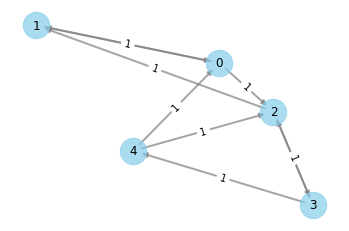

In [25]:
graph.remove_edge(1, 3)
print("\nDirected Graph after removing edge (1, 3):")
graph.display()

graph.visualize_graph()




Directed Graph after adding a vertex:
[0, 1, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0]
[0, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]


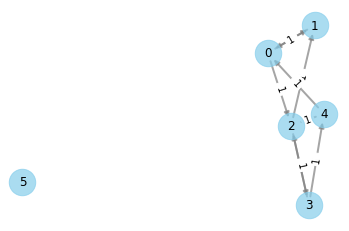

In [26]:
graph.add_vertex()
print("\nDirected Graph after adding a vertex:")
graph.display()

graph.visualize_graph()

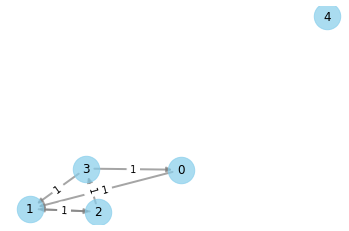


Directed Graph after removing vertex 1:
[0, 1, 0, 0, 0]
[0, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


In [27]:
graph.remove_vertex(1)
graph.visualize_graph()

print("\nDirected Graph after removing vertex 1:")
graph.display()


In [28]:
neighbors = graph.get_neighbors(0)
print("\nNeighbors of vertex 0:", neighbors)


Neighbors of vertex 0: [1]


In [29]:
has_edge = graph.has_edge(0, 2)
print("\nDoes edge (0, 2) exist?", has_edge)



Does edge (0, 2) exist? False


In [30]:
size = graph.graph_size()
print("\nGraph Size (Vertices, Edges):", size)

graph.clear_graph()


Graph Size (Vertices, Edges): (5, 6)



Directed Graph after clearing:


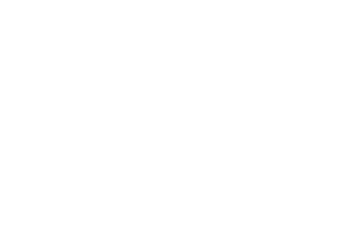

In [31]:
print("\nDirected Graph after clearing:")
graph.display()
graph.visualize_graph()